# Machine Learning with Python Cookbook
# Ch 11: Model Evaluation

## 11.1 Cross-Validating Models
Create a pipeline that preprocesses the data, trains the model, and eveluates it using cross-validation:

In [1]:
# Load libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Load digits dataset
digits = datasets.load_digits()

In [3]:
# Create features matrix
features = digits.data

In [4]:
# Create target vector
target = digits.target

In [5]:
# Create standardizer
standardizer = StandardScaler()

In [6]:
# Create logistic regression object
logit = LogisticRegression()

In [7]:
# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)

In [8]:
# Create a k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

In [9]:
# Conduct k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             features, # Feature matrix
                             target, # Target vector
                             cv=kf, # Performance metric
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU cores

In [10]:
# Calculate mean
cv_results.mean()

0.9693916821849783

In [11]:
# View score for all 10 folds
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

When we `fit` our standardization object, `standardizer`, we calculate the mean and variance of only the training set. Then we apply that tranformation (using `transform`) to both the training and test sets:

In [12]:
# Import library
from sklearn.model_selection import train_test_split

In [13]:
# Create training and test sets
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

In [14]:
# Fit standardizer to training set
standardizer.fit(features_train)

StandardScaler()

In [15]:
# Apply to both training and test sets
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

First, create a pipeline that preprocesses the data (e.g. `standardizer`) and then trains a model (logistic regression, `logit`):

In [16]:
# Create a pipeline
pipeline = make_pipeline(standardizer, logit)

Then run KFCV using that pipeline (and scikit does all the work for us):

In [17]:
# Do k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             features, # Feature matrix
                             target, # Target vector
                             cv=kf, # Performance metric
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU cores

## 11.2 Creating a Baseline Regression Model
Use sklearn's `DummyRegressor` to create a simple model to use as a baseline:

In [18]:
# Load libraries
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [19]:
# Load data
boston = load_boston()

In [20]:
# Create features
features, target = boston.data, boston.target

In [21]:
# Make test and training split
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=0)

In [22]:
# Create a dummy regressor
dummy = DummyRegressor()

In [23]:
# "Train" dummy regressor
dummy.fit(features_train, target_train)

DummyRegressor()

In [24]:
# Get R-squared score
dummy.score(features_test, target_test)

-0.001119359203955339

To compare, train our model and evaluate the performance score:

In [25]:
# Load library
from sklearn.linear_model import LinearRegression

In [26]:
# Train simple linear regression model
ols = LinearRegression()
ols.fit(features_train, target_train)

LinearRegression()

In [27]:
# Get R-squared score
ols.score(features_test, target_test)

0.6354638433202118

In [28]:
# Create dummy regressor that predicts 20's for everything
clf = DummyRegressor(strategy='constant', constant=20)
clf.fit(features_train, target_train)

DummyRegressor(constant=array(20), strategy='constant')

In [29]:
# Evaluate score
clf.score(features_test, target_test)

-0.06510502029325727

## 11.3 Creating a Baseline Classification Model
Use sklearn's `DummyClassifier` to create a simple baseline classifier to compare against your model:

In [30]:
# Load libraries
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

In [31]:
# Load data
iris = load_iris()

In [32]:
# Create target vector and feature matrix
features, target = iris.data, iris.target

In [33]:
# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=0)

In [34]:
# Create dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)

In [35]:
# "Train" model
dummy.fit(features_train, target_train)

DummyClassifier(random_state=1, strategy='uniform')

In [36]:
# Get accuracy score
dummy.score(features_test, target_test)

0.42105263157894735

## 11.4 Evaluating Binary Classifier Predictions
Measure accuracy in three-fold (the default # of folds) cross-validation by setting `scoring=’accuracy’`:

### Accuracy

In [37]:
# Load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [38]:
# Generate features matrix and target vector
X, y = make_classification(n_samples=10000, 
                           n_features=3, 
                           n_informative=3, 
                           n_redundant=0, 
                           n_classes=2, 
                           random_state=1)

In [39]:
# Create logistic regression
logit = LogisticRegression()

In [40]:
# Cross-validate model using accuracy
cross_val_score(logit, X, y, scoring='accuracy')

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [41]:
cross_val_score(logit, X, y, scoring='accuracy').mean()

0.9550999999999998

### Precision

In [42]:
# Cross-validate model using precision
cross_val_score(logit, X, y, scoring='precision')

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [43]:
cross_val_score(logit, X, y, scoring='precision').mean()

0.9587098102922853

### Recall

In [44]:
# Cross-validate model using recall
cross_val_score(logit, X, y, scoring='recall')

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [45]:
cross_val_score(logit, X, y, scoring='recall').mean()

0.9511999999999998

### F<sub>1</sub> Score
The F<sub>1</sub> score is a measure of correctness achieved in positive prediction (of observations labeled as positive, how many are actually positive):

In [46]:
# Cross-validate model using F1
cross_val_score(logit, X, y, scoring='f1')

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [47]:
cross_val_score(logit, X, y, scoring='f1').mean()

0.954931376985931

If we already have the true y values and the predicted y values, we can calculate metrics like accuracy and recall directly:

In [48]:
# Load library
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [49]:
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.1, 
                                                    random_state=1)

In [50]:
# Predict values for training target vector
y_hat = logit.fit(X_train, y_train).predict(X_test)

In [51]:
# Calculate accuracy
accuracy_score(y_test, y_hat)

0.947

## 11.5 Evaluating Binary Classifier Thresholds
Use sklearn's `roc_curve` to calculate the true and false positives at each threshold, then plot them:

In [52]:
# Load libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [53]:
# Create feature matrix and target vector
features, target = make_classification(n_samples=10000, 
                                       n_features=10, 
                                       n_classes=2, 
                                       n_informative=3, 
                                       random_state=3)

In [54]:
# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=0)

In [55]:
# Create classifier
logit = LogisticRegression()

In [56]:
# Train model
logit.fit(features_train, target_train)

LogisticRegression()

In [57]:
# Get predicted probabilities
target_probabilities = logit.predict_proba(features_test)[:,1]

In [58]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, 
                                                               target_probabilities)

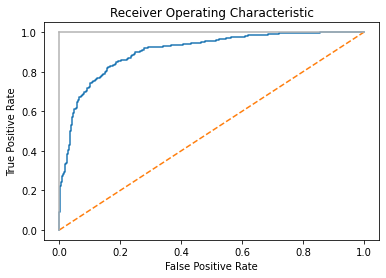

In [59]:
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls="--")
plt.plot([0,0], [1,0], c=".7"), plt.plot([1,1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

The better the model, the closer it is to the solid line.

We can use `predict_proba` to see the predicted probabilities for the first observation:

In [60]:
# Get predicted probabilities
logit.predict_proba(features_test)[0:1]

array([[0.94807059, 0.05192941]])

In [61]:
logit.classes_

array([0, 1])

In this case, the first observation has an 87% chance of being in the negative (0) class and 13% in the positive.

We can adjust the probability threshold if, for example, a false positive would be very costly. We may fail to predict some positives, but we can be more confident positive predictions are correct.

In [62]:
print(f"Threshold: {threshold[116]}")
print(f"True Positive Rate: {true_positive_rate[116]}")
print(f"False Positive Rate: {false_positive_rate[116]}")

Threshold: 0.5275234723627574
True Positive Rate: 0.8016032064128257
False Positive Rate: 0.1536926147704591


Let's increase the threshold to ~80%:

In [63]:
print(f"Threshold: {threshold[45]}")
print(f"True Positive Rate: {true_positive_rate[45]}")
print(f"False Positive Rate: {false_positive_rate[45]}")

Threshold: 0.8205130518485784
True Positive Rate: 0.5791583166332666
False Positive Rate: 0.04590818363273453


TPR drops, but so does FPR.

Calculate the AUCROC using `roc_auc_score`:

In [64]:
# Calculate area under curve
roc_auc_score(target_test, target_probabilities)

0.9041916167664671

## 11.6 Evaluating Muilticlass Classifier Predictions
Use cross-validation with an evaluation metric capable of handling more than two classes:

In [65]:
# Load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [66]:
# Create feature matrix and target vector
features, target = make_classification(n_samples=10000, 
                                       n_features=3, 
                                       n_classes=3, 
                                       n_informative=3, 
                                       n_redundant=0,
                                       random_state=1)

In [67]:
# Create logistic regression
logit = LogisticRegression()

In [68]:
# Cross-validate model using accuracy
cross_val_score(logit, features, target, scoring='accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

In [69]:
# Cross-validate model using macro averaged F1 score
cross_val_score(logit, features, target, scoring='f1_macro')

array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

## 11.7 Visualizing a Classifier’s Performance
Use a confusion matrix, which compares predicted classes and true classes:

In [70]:
# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [71]:
# Load data
iris = datasets.load_iris()

In [72]:
# Create feature matrix
features = iris.data

In [73]:
# Create target vector
target = iris.target

In [74]:
# Create list of target class names
class_names = iris.target_names

In [75]:
# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=1)

In [76]:
# Create logisitic regression
classifier = LogisticRegression()

In [77]:
# Train model and make predictions
target_predicted = classifier.fit(features_train, target_train).predict(features_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
# Create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)

In [79]:
# Create pandas DataFrame
df = pd.DataFrame(matrix, index=class_names, columns=class_names)

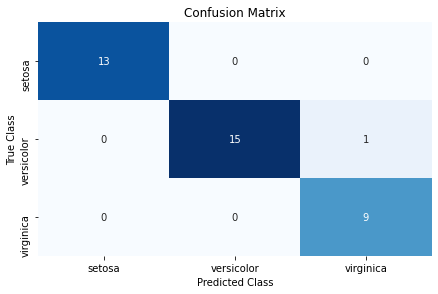

In [80]:
# Create heatmap
sns.heatmap(df, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

## 11.8 Evaluating Regression Models
Use Mean Squared Error (MSE):

In [81]:
# Load libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [82]:
# Generate a target vector
features, target = make_regression(n_samples=100, 
                                       n_features=3, 
                                       n_targets=1, 
                                       n_informative=3, 
                                       noise=50,
                                       coef=False,
                                       random_state=1)

In [83]:
# Create a linear regression object
ols = LinearRegression()

In [84]:
# Cross-validate the linear regression using (negative) MSE
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

Another common regression metric is the coefficient of determination, R<sup>2</sup>:

In [85]:
# Cross-validate the linear regression using R-squared
cross_val_score(ols, features, target, scoring='r2')

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

## 11.9 Evaluating Clustering Models
One option to evaluate clustering is to use silhouette cefficients, which measure the quality of the clusters:

In [86]:
# Load libraries
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [87]:
# Generate a feature matrix
features, _ = make_blobs(n_samples=1000, 
                                       n_features=10, 
                                       centers=2, 
                                       cluster_std=0.5, 
                                       shuffle=True,
                                       random_state=1)

In [88]:
# Cluster data using k-means to predict classes
model = KMeans(n_clusters=2, random_state=1).fit(features)

In [89]:
# Get predicted classes
target_predicted = model.labels_

In [90]:
# Evaluate model
silhouette_score(features, target_predicted)

0.8916265564072142

## 11.10 Creating a Custom Evaluation Metric
Create the metric as a function and convert it into a scorer function using sklearn's `make_scorer`:

In [91]:
# Load libraries
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

In [92]:
# Generate features matrix and target vector
features, target = make_regression(n_samples=100, 
                                   n_features=3, 
                                   random_state=1)

In [93]:
# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.10, random_state=1)

In [94]:
# Create a custom metric
def custom_metric(target_test, target_predicted):
    # Calculate r-squared score
    r2 = r2_score(target_test, target_predicted)
    # Return r-squared score
    return r2

In [95]:
# Make scorer and define that higher scores are better
score = make_scorer(custom_metric, greater_is_better=True)

In [96]:
# Create ridge regression object
classifier = Ridge()

In [97]:
# Train ridge regression model
model = classifier.fit(features_train, target_train)

In [98]:
# Apply custom scorer
score(model, features_test, target_test)

0.9997906102882058

Compare to built-in r-squared method:

In [99]:
# Predict values
target_predicted = model.predict(features_test)

In [100]:
# Calcualte r-squared score
r2_score(target_test, target_predicted)

0.9997906102882058

## 11.11 Visualizing the Effect of Training Set Size
Plot the learning curve:

In [101]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

In [102]:
# Load data
digits = load_digits()

In [103]:
# Create feature matrix and target vector
features, target = digits.data, digits.target

In [104]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(# Classifier
                                                        RandomForestClassifier(),
                                                        # Feature matrix
                                                        features,
                                                        # Target vector
                                                        target,
                                                        # Number of folds
                                                        cv=10,
                                                        # Performance metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1,
                                                        # Sizes of 50
                                                        # training set
                                                       train_sizes=np.linspace(
                                                       0.01,
                                                       1.0,
                                                       50))

In [105]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

In [106]:
# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

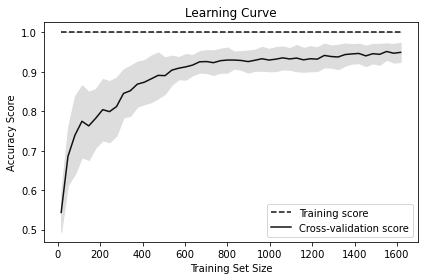

In [107]:
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## 11.12 Creating a Text Report of Evaluation Metrics
Use sklearn's `classification_report`:

In [108]:
# Load libraries
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [109]:
# Load data
iris = datasets.load_iris()

In [110]:
# Create feature matrix
features = iris.data

In [111]:
# Create target vector
target = iris.target

In [112]:
# Create list of target class names
class_names = iris.target_names

In [113]:
# Create training and test set
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=1)

In [114]:
# Create logistic regression
classifier = LogisticRegression()

In [115]:
# Train model and make predictions
model = classifier.fit(features_train, target_train)
target_predicted = model.predict(features_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
# Create a classification report
print(classification_report(target_test,
                            target_predicted,
                            target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



## 11.13 Visualizing the Effect of Hyperparameter Values
Plot the validation curve:

In [117]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

In [118]:
# Load data
digits = load_digits()

In [119]:
# Create feature matrix and target vector
features, target = digits.data, digits.target

In [120]:
# Create range of values for parameter
param_range = np.arange(1, 250, 2)

In [121]:
# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(
    # Classifier
    RandomForestClassifier(),
    # Feature matrix
    features,
    # Target vector
    target,
    # Hyperparameter to examine
    param_name="n_estimators",
    # Range of hyperparameter's values
    param_range=param_range,
    # Number of folds
    cv=3,
    # Performance metric
    scoring="accuracy",
    # Use all computer cores
    n_jobs=-1)

In [122]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

In [123]:
# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

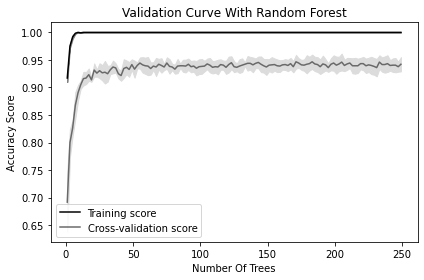

In [124]:
# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accuracy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()